<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/APLICACION_1_JUEGO_7_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO 5.1**
El famoso juego 7-11, requiere que el jugador lance dos dados una o más veces hasta tomar la decisión de que se gana o se pierde el juego. El juego se gana si en el primer lanzamiento los dados suman 7 u 11, ó aparece un $4,5,6,8,9610$ en el primer lanzamiento y la misma suma reaparece antes de que aparezca un 7. Por otra parte, el juego se pierde si en el primer lanzamiento los dados suman 2, 3 ó 12, ó aparece un $4,5,6,8,9$ ó 10 en el primer lanzamiento y luego sale un 7 antes de que se repita el primer lanzamiento. Si el valor de la apuesta es de $\$ 1$, y la ganancia cada vez que se gana un juego es de $\$ 1$, ¿cuál sería la probabilidad de quiebra si la cantidad inicial disponible es de $\$ 20$ ? (Asuma que el juego también se termina cuando se acumulan $\$ 50$.)

Para resolver este problema primero definiremos las reglas del juego:


*   El jugador gana inmediatamente si la suma de los dados es 7 u 11 en el primer lanzamiento.
*   El jugador priede inmediatamente si al suma de los dados es 2,3 o 12 en el primer lanzamiento.
* Si se obtiene un 4,5,6,8,9 o 10, esa suma se convierte en el "punto". El jugador debe seguir lanzando los dados hasta que vuelva a obtener esa suma(ganar) o un 7(perder)





Primero, para simular el lanzamiento de los dados, generaremos dos numeros aleatorios entre 0 y 1, donde la probabilidad de que cada valor (1 al 6) del dado aparezca es de 1/6, por lo que:

Si $0 \leq R < \frac{1}{6} $  x = 1 \\
Si $\frac{1}{6} \leq R < \frac{2}{6} $  x = 2 \\
Si $\frac{2}{6} \leq R < \frac{3}{6} $  x = 3 \\
Si $\frac{3}{6} \leq R < \frac{4}{6} $  x = 4 \\
Si $\frac{4}{6} \leq R < \frac{5}{6} $  x = 5 \\
Si $\frac{5}{6} \leq R < \frac{6}{6} $  x = 6 \\

In [364]:
import random as rnd
import matplotlib.pyplot as plt

La siguiente función nos generas los numeros aleatorios que simulan el lanzamiento de los dados. Después, aplica el cirterio anterior para clasificar el número del dado correspondiente.

In [365]:
def lanzamiento():
  d1 = 0
  d2 = 0
  u1 = rnd.random()
  u2 = rnd.random()

  if 0 <= u1 <= (1/6):
    d1 = 1
  elif (1/6) < u1 <= (2/6):
    d1 = 2
  elif (2/6) < u1 <= (3/6):
    d1 = 3
  elif (3/6) < u1 <= (4/6):
    d1 = 4
  elif (4/6) < u1 <= (5/6):
    d1 = 5
  elif (5/6) < u1 <= 1:
    d1 = 6

  if 0 <= u2 <= (1/6):
    d2 = 1
  elif (1/6) < u2 <= (2/6):
    d2 = 2
  elif (2/6) < u2 <= (3/6):
    d2 = 3
  elif (3/6) < u2 <= (4/6):
    d2 = 4
  elif (4/6) < u2 <= (5/6):
    d2 = 5
  elif (5/6) < u2 <= 1:
    d2 = 6
  return u1,u2,d1,d2

Geberamos la fución partida() para simular la partida hasta que allá un punto de quiebre.

In [237]:
def partida():
  u_1 = []
  u_2 = []
  d_1 = []
  d_2 = []
  dinero = []
  cant_i = 8
  objetivo = 10
  ganancia = 1
  apuesta = 1
  suma = []
  g = [] #Nos guarda 1 si gana, -1 si pierde y 0 siempre que este dentro del ciclo.
  while 0 < cant_i < objetivo:
    [u1,u2,d1,d2] = lanzamiento()
    d_1.append(d1)
    d_2.append(d2)
    u_1.append(u1)
    u_2.append(u2)
    resultado = d1 + d2
    suma.append(resultado)
    dinero.append(cant_i)
    if resultado in {7, 11}:
        cant_i += ganancia
        g.append('1')
    elif resultado in {2, 3, 12}:
        cant_i -= apuesta
        g.append('-1')
    else:
        punto = resultado
        g.append('0')
        while True:
          dinero.append(cant_i)
          [u1,u2,d1,d2] = lanzamiento()
          d_1.append(d1)
          d_2.append(d2)
          u_1.append(u1)
          u_2.append(u2)
          resultado = d1 + d2
          suma.append(resultado)
          if resultado == punto:
            cant_i += ganancia
            g.append('1')
            break
          elif resultado == 7:
            cant_i -= apuesta
            g.append('-1')
            break
          else:
            g.append('0')

  A = [[u_1[i],u_2[i],d_1[i],d_2[i],suma[i], g[i], dinero[i]] for i in range(len(u_1))]
  head = ['# ALEATORIO', '# ALEATORIO', 'DADO 1', 'DADO 2', 'SUMA','GANA/PER','DINERO ACTUAL']
  A.insert(0,head)

  from tabulate import tabulate
  # Imprimir los datos en formato de tabla
  print(tabulate(A, headers="firstrow", tablefmt="fancy_grid",colalign=("center",)*len(head)))

  if dinero == 0:
        print("Quiebra: dinero llegó a $0")
  else:
        print(f"Juego terminado con ${cant_i}")

  return

  Para ejemplificar el problema, generaremos una partida con un valor inicial de 8 y un objetivo de 10, esto para que la tabla no se haga muy larga y sea posible visualizar lo que nos genera la función.

In [249]:
partida()

╒═══════════════╤═══════════════╤══════════╤══════════╤════════╤════════════╤═════════════════╕
│  # ALEATORIO  │  # ALEATORIO  │  DADO 1  │  DADO 2  │  SUMA  │  GANA/PER  │  DINERO ACTUAL  │
╞═══════════════╪═══════════════╪══════════╪══════════╪════════╪════════════╪═════════════════╡
│   0.319487    │   0.226806    │    2     │    2     │   4    │     0      │        8        │
├───────────────┼───────────────┼──────────┼──────────┼────────┼────────────┼─────────────────┤
│   0.159312    │   0.490124    │    1     │    3     │   4    │     1      │        8        │
├───────────────┼───────────────┼──────────┼──────────┼────────┼────────────┼─────────────────┤
│   0.458545    │   0.878747    │    3     │    6     │   9    │     0      │        9        │
├───────────────┼───────────────┼──────────┼──────────┼────────┼────────────┼─────────────────┤
│   0.894566    │   0.599103    │    6     │    4     │   10   │     0      │        9        │
├───────────────┼───────────────┼───────

Nos damos cuenta que, para este caso, la partida termina cuando se alcanza el objetivo, sin embargo existirán casos donde se termine cuando se terminé su dinero, es decir, llegué a cero. Esto se observa en el siguiente ejemplo:

In [252]:
partida()

╒═══════════════╤═══════════════╤══════════╤══════════╤════════╤════════════╤═════════════════╕
│  # ALEATORIO  │  # ALEATORIO  │  DADO 1  │  DADO 2  │  SUMA  │  GANA/PER  │  DINERO ACTUAL  │
╞═══════════════╪═══════════════╪══════════╪══════════╪════════╪════════════╪═════════════════╡
│   0.383863    │    0.83802    │    3     │    6     │   9    │     0      │        8        │
├───────────────┼───────────────┼──────────┼──────────┼────────┼────────────┼─────────────────┤
│   0.745927    │   0.760437    │    5     │    5     │   10   │     0      │        8        │
├───────────────┼───────────────┼──────────┼──────────┼────────┼────────────┼─────────────────┤
│   0.121819    │   0.400362    │    1     │    3     │   4    │     0      │        8        │
├───────────────┼───────────────┼──────────┼──────────┼────────┼────────────┼─────────────────┤
│   0.400894    │   0.484837    │    3     │    3     │   6    │     0      │        8        │
├───────────────┼───────────────┼───────

Ahora, el problema nos dice que la ***cantidad inicial disponible es de 20 y se termina cuando se alcancen 50. ***

In [366]:
def partida_f():
  cant_i = 20 #Cantidad inicial disponible
  objetivo = 50 #Objetivo a alcanzar
  ganancia = 1
  apuesta = 1
  while 0 < cant_i < objetivo: #Se repite siempre que no se termine el dinero o se alcance el objetivo
    [u1,u2,d1,d2] = lanzamiento() #Obtenemos los lanzamienros
    resultado = d1 + d2 #Sumamos los dados
    if resultado in {7, 11}: #Si cae 7 o 11 se gana
        cant_i += ganancia
    elif resultado in {2, 3, 12}: #Si cae 2,3, o 12 se pierde
        cant_i -= apuesta
    else:
        punto = resultado #Si cae otra cantidad, se le asigna a una variable punto
        while True: #Se repite hasta que la suma de los lanzamientos sea igual a la variable punto
          [u1,u2,d1,d2] = lanzamiento()
          resultado = d1 + d2
          if resultado == punto:
            cant_i += ganancia
            break
          elif resultado == 7: #Si cae un 7, se pierde directamente la partida
            cant_i -= apuesta
            break
  return cant_i == 0

La condición de quiebre nos dice que cuando salgamos del ciclo la funcion retornara un 'true = 0' si el dinero del jugador es 0.
Para aplicar el ejercicio del libro, no se imprimirá la tabla ya que al hacer las simulaciones esta se haría muy larga.

Para generar la ***probabilidad de quiebre*** haremos la siguiente función

In [372]:
def estimar_probabilidad_quiebre(n_simulaciones):
  """Estima la probabilidad de quiebre después de n simulaciones."""
  probabilidad = 0
  prob = []
  res_1 = []
  quiebre = 0
  for i in range(n_simulaciones):
    res = partida_f()
    res_1.append(res)

  for i in range(n_simulaciones):
    if res_1[i] == True:
     quiebre += 1
     prob.append(quiebre/(i+1))

  probabilidad = quiebre/ n_simulaciones
  return  prob, probabilidad

Escogemos un ***número más grande de simulaciones***

In [373]:
n_simulaciones = 10000

Calculamos la probabilida de quiebre

In [374]:
[prob,probabilidad_quiebre] = estimar_probabilidad_quiebre(n_simulaciones)
print(f'Probabilidad de quiebre: {probabilidad_quiebre}')

Probabilidad de quiebre: 0.7598


Para visualizar mejor la convergencia de la probabilidad, la graficaremos:

Text(0.5, 1.0, 'Convergencia de la probabilidad de quiebra')

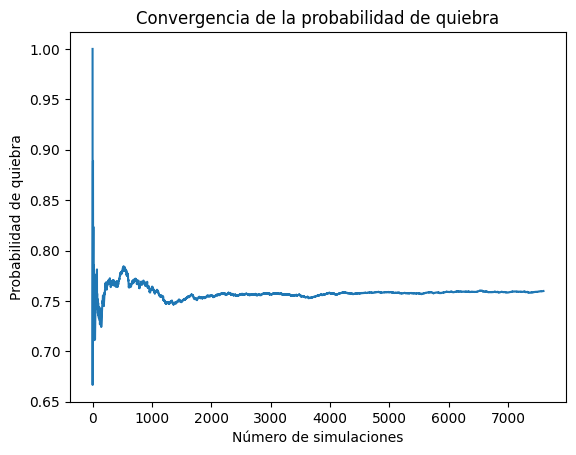

In [375]:
plt.plot(prob)
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad de quiebra')
plt.title('Convergencia de la probabilidad de quiebra')